**Modelling**

After EDA let's do Modelling

In [1]:
# General Libraries
import pandas as pd
import numpy as np
from itertools import product
import warnings
from tqdm import tqdm

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing, modelling & evaluation
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score,  accuracy_score, precision_recall_fscore_support
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

# Language Processing
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
seek = pd.read_csv('final_data.csv')

In [3]:
seek.head()

,Salary Range,Link,Title,Listing Date,Expiry Date,Job Title,Job Teaser,Advertiser,Area,Work Type,...,Job Description,Strong Words,Location_few,new_job_title,new_category,exp_level,salary,final_salary,salary_type,final_salary_nona
0,0-70000,https://www.seek.com.au/job/40345298,Junior Data Scientist,2019-11-08T01:16:08.000Z,2019-12-08T12:59:59.000Z,Junior Data Scientist,JUNIOR DATA SCIENTIST | SYDNEY CBD | OPPORTUNI...,Opus Recruitment Solutions,NaN,Full Time,...,JUNIOR DATA SCIENTIST | SYDNEY CBD | OPPORTUNI...,['JUNIOR DATA SCIENTIST | SYDNEY CBD | OPPORTU...,Sydney,data scientist,information_technology,1 Junior,$70000 - $80000 per annum,80000.0,year,80000.0
1,0-70000,https://www.seek.com.au/job/40369561,Quantitative Analyst / Data Scientist,2019-11-12T02:46:05.000Z,2019-12-12T12:59:59.000Z,Quantitative Analyst / Data Scientist,Exciting opportunity for an experienced Data S...,Ethos BeathChapman,"CBD, Inner West & Eastern Suburbs",Full Time,...,Data Scientist – Investment ManagementAre you ...,"['Data Scientist – Investment Management', 'Re...",Sydney,data scientist,accounting_services,2 Mid-Level,na,NaN,NaN,115000.0
2,0-70000,https://www.seek.com.au/job/40285384,Data Scientist,2019-10-31T00:31:30.000Z,2019-11-30T12:59:59.000Z,Data Scientist,Conduct innovative research by utilising state...,Swinburne University of Technology,CBD & Inner Suburbs,Full Time,...,"About the JobIn this exciting role, you could ...","['About the Job', 'About Swinburne University ...",Melbourne,data scientist,science_technology,2 Mid-Level,na,54000.0,year,54000.0
3,0-70000,https://www.seek.com.au/job/40285385,Data Scientist,2019-10-31T00:31:30.000Z,2019-11-30T12:59:59.000Z,Data Scientist,Conduct innovative research by utilising state...,Swinburne University of Technology,CBD & Inner Suburbs,Full Time,...,"About the JobIn this exciting role, you could ...","['About the Job', 'About Swinburne University ...",Melbourne,data scientist,science_technology,2 Mid-Level,na,54000.0,year,54000.0
4,0-70000,https://www.seek.com.au/job/40241958,Data Scientist,2019-10-24T15:25:27.000Z,2019-11-24T12:59:59.000Z,Data Scientist,Data Scientist Role with Deloitte Consulting ...,Deloitte,CBD & Inner Suburbs,Full Time,...,Salary packaging - to suit your personal and f...,"['About the team', '', 'What will your typical...",Melbourne,data scientist,information_technology,2 Mid-Level,na,NaN,NaN,140000.0


sal_mean = seek['final_salary_nona'].mean()
y_pred_baseline = [sal_mean for i in range(len(seek))]
y_pred_baseline

In [4]:
seek.rename(columns={"Job Description": "Job_Description", "Salary Range":"Salary_Range"}, inplace=True)

In [5]:
seek.shape

(1437, 25)

In [6]:
seek.columns

Index(['Salary_Range', 'Link', 'Title', 'Listing Date', 'Expiry Date',
       'Job Title', 'Job Teaser', 'Advertiser', 'Area', 'Work Type',
       'Classification', 'Salary', 'Salary Type', 'JD', 'Location',
       'Job_Description', 'Strong Words', 'Location_few', 'new_job_title',
       'new_category', 'exp_level', 'salary', 'final_salary', 'salary_type',
       'final_salary_nona'],
      dtype='object')

In [7]:
seek['salary_type'].value_counts()

year    349
day      80
hour     29
week     10
Name: salary_type, dtype: int64

In [8]:
#take categorical features which you want to use for modelling
feature_subset = seek[['Location_few', 'new_job_title', 'new_category', 'exp_level', 'Work Type', 'final_salary_nona']]

In [9]:
feature_subset.head()

,Location_few,new_job_title,new_category,exp_level,Work Type,final_salary_nona
0,Sydney,data scientist,information_technology,1 Junior,Full Time,80000.0
1,Sydney,data scientist,accounting_services,2 Mid-Level,Full Time,115000.0
2,Melbourne,data scientist,science_technology,2 Mid-Level,Full Time,54000.0
3,Melbourne,data scientist,science_technology,2 Mid-Level,Full Time,54000.0
4,Melbourne,data scientist,information_technology,2 Mid-Level,Full Time,140000.0


In [10]:
#converting categorical features to numerical features
#Use get dummies. Only for sequential give 1, 2, 3 not for location 


In [11]:
feature_subset.dropna(axis=0, how='any', inplace=True)

In [12]:
feature_subset.isnull().sum()

Location_few         0
new_job_title        0
new_category         0
exp_level            0
Work Type            0
final_salary_nona    0
dtype: int64

In [13]:
feature_subset.columns

Index(['Location_few', 'new_job_title', 'new_category', 'exp_level',
       'Work Type', 'final_salary_nona'],
      dtype='object')

Creating train and test tset

In [14]:
train , test = train_test_split(feature_subset, test_size = 0.2)

x_train = train.drop('final_salary_nona', axis=1)
y_train = train['final_salary_nona']

x_test = test.drop('final_salary_nona', axis = 1)
y_test = test['final_salary_nona']

In [15]:
x_train = pd.get_dummies(x_train)
x_train.head()


,Location_few_Melbourne,Location_few_Sydney,Location_few_other,new_job_title_business analyst,new_job_title_data analyst,new_job_title_data engineer,new_job_title_data scientist,new_category_accounting_services,new_category_govt_health,new_category_information_technology,new_category_other,new_category_sales_marketing,new_category_science_technology,exp_level_1 Junior,exp_level_2 Mid-Level,exp_level_3 Senior,Work Type_Casual/Vacation,Work Type_Contract/Temp,Work Type_Full Time,Work Type_Part Time
1038,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1276,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
1051,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
1338,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
361,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0


In [16]:
x_test = pd.get_dummies(x_test)

In [17]:
type(x_test)

pandas.core.frame.DataFrame

In [18]:
#find columns with low variance!**
low_var_columns = []
for column in list(feature_subset.columns):
    if np.max(feature_subset[column].value_counts(normalize=True)) > 0.9:
        low_var_columns.append(column)
low_var_columns

[]

Our features are ready for the model. 

In [19]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, LassoCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

In [20]:
x = feature_subset.drop('final_salary_nona', axis=1)

In [21]:
x = pd.get_dummies(x)

In [22]:
y = feature_subset['final_salary_nona']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1147, 20), (287, 20), (1147,), (287,))

**KNN Regression**

In [24]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

knn_params = {
    'n_neighbors':list(range(1,100)),
    'weights':['distance','uniform']
}
knn_gs = GridSearchCV(knn, knn_params, cv=3)
knn_gs.fit(x_train, y_train)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['distance', 'uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [25]:
knn_best = knn_gs.best_estimator_
print(knn_gs.best_params_)
print(knn_gs.best_score_)

{'n_neighbors': 64, 'weights': 'uniform'}
0.052050965586563996


**SVR**

In [26]:
from sklearn.svm import SVR
svr_params = {'kernel': ['poly', 'rbf']}
svr = SVR()


svr_gs = GridSearchCV(SVR(), svr_params, n_jobs=-1, cv=3, verbose=1)
svr_gs.fit(x_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    2.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1, param_grid={'kernel': ['poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [27]:
best_svr = svr_gs.best_estimator_
print(svr_gs.best_params_)
print(svr_gs.best_score_)

{'kernel': 'rbf'}
-0.024429158736716635


**Extra Tree Regressor**

In [28]:
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier
rfr = ExtraTreesRegressor(random_state=3, n_jobs=-1)
rfr_params = {'n_estimators': [500, 750, 1000]}

rfr_gs = GridSearchCV(rfr, rfr_params, n_jobs=-1, cv=3, verbose=1)
rfr_gs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    2.1s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    3.7s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse',
                                           max_depth=None, max_features='auto',
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators='warn', n_jobs=-1,
                                           oob_score=False, random_state=3,
                                           verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'n_estimators': [500, 750, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=

In [29]:
best_rfr = rfr_gs.best_estimator_
print(rfr_gs.best_params_)
print(rfr_gs.best_score_)

{'n_estimators': 750}
-0.09352161085430069


**Decision Tree Regressor**

In [30]:
# Perform a gridsearch to get the optimal hyperparameters for our decision tree model, based on ou X and Y variables

dtr_params = {
    'max_depth':[None,1,2,3,4,5,6,7,8,9,10],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

dtr = DecisionTreeRegressor()
dtr_gs = GridSearchCV(dtr, dtr_params, cv=5, n_jobs=-1, verbose=1, refit=True)

# Fit the data to the gridsearch
dtr_gs.fit(x, y)

Fitting 5 folds for each of 847 candidates, totalling 4235 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 592 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 4235 out of 4235 | elapsed:    3.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 1

In [31]:
best_dtr = dtr_gs.best_estimator_
print(dtr_gs.best_params_)
print(dtr_gs.best_score_)

{'max_depth': 3, 'max_features': 5, 'min_samples_split': 15}
-0.03214092206828861


**Evaluation of Models**

In [32]:
evaluation = pd.DataFrame()
evaluation['Regressor'] = ['KNN', 'SVR', 'ExtraTreesRegressor', 'DTR']
evaluation['Training Accuracy (using CV)'] = [round(knn_gs.best_score_,3),
                                             round(svr_gs.best_score_, 3),
                                             
                                             round(rfr_gs.best_score_, 3),
                                             round(dtr_gs.best_score_, 3)] 
evaluation['Testing Accuracy'] = [
                                round(knn_best.score(x_test, y_test), 3),
                                round(best_svr.score(x_test, y_test), 3),
                                round(best_rfr.score(x_test, y_test), 3),
                                round(best_dtr.score(x_test, y_test), 3)] 
evaluation.sort_values(by= 'Regressor', inplace = False)

,Regressor,Training Accuracy (using CV),Testing Accuracy
3,DTR,-0.032,0.005
2,ExtraTreesRegressor,-0.094,-0.237
0,KNN,0.052,0.071
1,SVR,-0.024,-0.035


Above, I have tried regression models by imputing salary values. 

Next, I will be trying classification model by giving low and high salary threshold

**NLP of Job Description**

In [33]:
from nltk.tokenize import RegexpTokenizer

In [34]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import re

#tokenize words
seek['tokens'] = seek.Job_Description.apply(lambda x: [w for w in word_tokenize(x.lower()) if w.isalpha()])

#remove words over 9 characters long
seek['s_tokens'] =seek.tokens.apply(lambda x: [word for word in x if len(word) <= 7])

# Remove stop words
seek['noStops'] = seek.s_tokens.apply(lambda x: [w for w in x if w not in stopwords.words('english')])

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize
seek['lemmatized'] = seek.noStops.apply(lambda x: [wordnet_lemmatizer.lemmatize(w) for w in x])

# Put it all together in a single string
seek['lemmatizedStr'] = seek.lemmatized.apply(lambda x: ' '.join(x))

In [35]:
seek[['tokens', 's_tokens', 'noStops', 'lemmatized','lemmatizedStr']].sample(10)

,tokens,s_tokens,noStops,lemmatized,lemmatizedStr
136,"[a, global, leader, in, consulting, technology...","[a, global, leader, in, and, digital, the, gro...","[global, leader, digital, group, address, enti...","[global, leader, digital, group, address, enti...",global leader digital group address entire bre...
580,"[due, to, a, spike, in, potential, lending, op...","[due, to, a, spike, in, lending, my, client, h...","[due, spike, lending, client, work, flow, issu...","[due, spike, lending, client, work, flow, issu...",due spike lending client work flow issue need ...
720,"[month, contract, federal, government, agency,...","[month, federal, agency, desired, about, the, ...","[month, federal, agency, desired, group, feder...","[month, federal, agency, desired, group, feder...",month federal agency desired group federal age...
1401,"[role, purpose, to, use, your, significant, an...","[role, purpose, to, use, your, and, bi, to, an...","[role, purpose, use, bi, analyse, plan, lead, ...","[role, purpose, use, bi, analyse, plan, lead, ...",role purpose use bi analyse plan lead bi proje...
1081,"[about, sigma, healthcare, sigma, healthcare, ...","[about, sigma, sigma, is, a, leading, full, li...","[sigma, sigma, leading, full, line, operate, n...","[sigma, sigma, leading, full, line, operate, n...",sigma sigma leading full line operate network ...
886,"[we, are, looking, for, a, quantitative, analy...","[we, are, looking, for, a, analyst, to, join, ...","[looking, analyst, join, team, key, role, data...","[looking, analyst, join, team, key, role, data...",looking analyst join team key role data across...
1378,"[business, analyst, at, a, nfp, organisation, ...","[analyst, at, a, nfp, your, new, company, a, n...","[analyst, nfp, new, company, nfp, based, looki...","[analyst, nfp, new, company, nfp, based, looki...",analyst nfp new company nfp based looking anal...
397,"[company, overviewan, exciting, opportunity, e...","[company, exists, to, join, a, wealth, company...","[company, exists, join, wealth, company, withi...","[company, exists, join, wealth, company, withi...",company exists join wealth company within team...
985,"[the, companya, financial, institution, is, se...","[the, is, seeking, to, work, on, a, analyst, w...","[seeking, work, analyst, work, aim, support, a...","[seeking, work, analyst, work, aim, support, a...",seeking work analyst work aim support analyst ...
759,"[the, role, melbourne, cbd, location, competit...","[the, role, cbd, salary, month, fixed, term, r...","[role, cbd, salary, month, fixed, term, racv, ...","[role, cbd, salary, month, fixed, term, racv, ...",role cbd salary month fixed term racv growth t...


Now, I will use a classifier model

In [36]:
seek.Salary_Range.value_counts(sort=True)

70000-120000     656
120000-999999    466
0-70000          315
Name: Salary_Range, dtype: int64

In [37]:
seek.Salary_Range.value_counts().sum()

1437

In [38]:
seek.Salary_Range.isnull().sum()

0

For the salary range, I will make the average value. For lower and below salary range, will take the value just above or below the range.

In [39]:
salary_range_map = {'70000-120000': 95000, '120000-999999': 140000, '0-70000': 60000}

seek['Salary_Range'] = seek.Salary_Range.map(salary_range_map)

In [40]:
salary_threshold = []
for salary in seek.Salary_Range:
    if salary < 115000:
        salary_threshold.append('lower_threshold')
    else:
        salary_threshold.append('upper_threshold')
    
seek['salary_threshold'] = salary_threshold

In [41]:
word_data = seek[['salary_threshold','lemmatizedStr','Classification','Location']]

In [42]:
salary_threshold_map = {
                        'lower_threshold' : 0,
                        'upper_threshold' : 1}

word_data['salary_threshold'] = word_data.salary_threshold.map(salary_threshold_map)

In [43]:
word_data.head()

,salary_threshold,lemmatizedStr,Classification,Location
0,0,junior data sydney cbd grow ideal recent year ...,Information & Communication Technology,Sydney
1,0,data data looking next step career working dat...,Banking & Financial Services,Sydney
2,0,jobin role could main area centre allow develo...,Science & Technology,Melbourne
3,0,jobin role could main area centre allow develo...,Education & Training,Melbourne
4,0,salary suit apple hp lenovo see data wish woul...,Consulting & Strategy,Melbourne


In [44]:
word_data.tail()

,salary_threshold,lemmatizedStr,Classification,Location
1432,1,ayan urgent data role must full work right job...,Information & Communication Technology,Melbourne
1433,1,conduct system remedy gap engage resolve issue...,Information & Communication Technology,Melbourne
1434,1,cx leading contact centre partner leading acro...,Banking & Financial Services,Sydney
1435,1,analyst thrive highly variety working product ...,Information & Communication Technology,Brisbane
1436,1,month initial based defense best company clien...,Information & Communication Technology,Adelaide


**Converting Words to Numerical Data**

Models work with only numerical data. So, TfidfVectorizer and CountVectorizer both are methods used for converting text data into vectors.

TFIDFVectorizer measures value which increases proportionally to count, but is offset by the frequency of the word in the corpus
CountVectorizer counts the word frequencies


**Hashing and TF-IDF**

In [45]:
stop_words = ('people', 'client', 'using', 'please', 'apply', 'science', 'data', 'year', 'need', 'process',
             'within', 'across', 'support', 'working', 'set', 'system', 'part', 'company', 'ensure', 'join',
             'looking', 'provide', 'include', 'level', 'tool', 'contact', 'key', 'change', 'deliver', 'new',
             'based', 'ability', 'use', 'user', 'market', 'project', 'group', 'product', 'service', 'range',
             'report', 'career', 'highly', 'develop', 'make', 'month', 'well', 'leading', 'offer', 'world',
             'end', 'one', 'build', 'big', 'help', 'best', 'source', 'also', 'value', 'assist', 'drive', 'like',
             'sydney', 'via', 'would', 'excel', 'must', 'click', 'plan', 'field', 'high', 'good', 'method', 'making', 'submit',
             'online', 'member', 'life')

In [46]:
from sklearn.model_selection import train_test_split
X = word_data.lemmatizedStr
y = word_data.salary_threshold
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.7, stop_words=stop_words)
tfidf_train_fit = tfidf_vectorizer.fit(X_train)
tfidf_train = tfidf_vectorizer.transform(X_train)

tfidf_test = tfidf_vectorizer.transform(X_test)
print(tfidf_vectorizer.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])

['aami', 'aaron', 'aasifa', 'ab', 'abhinav', 'abide', 'abigail', 'able', 'abreast', 'abroad']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [48]:
tfidf_X = tfidf_vectorizer.transform(X)

**TF-IDF and Logistic Regression**

In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.03, class_weight='balanced', solver='newton-cg', random_state=42)
lr.fit(tfidf_train, y_train)
y_predicted_counts = lr.predict(tfidf_test)

In [50]:
from sklearn.metrics import classification_report, roc_auc_score
print("=== Classification Report ===")
print(classification_report(y_test, y_predicted_counts))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       243
           1       0.54      0.57      0.55       117

    accuracy                           0.70       360
   macro avg       0.66      0.67      0.66       360
weighted avg       0.71      0.70      0.70       360



In [51]:
from sklearn.metrics import roc_auc_score
roc_test_tfidf_lr = roc_auc_score(y_test, y_predicted_counts)
print(roc_auc_score(y_test, y_predicted_counts))

0.6669832225387781


In [52]:

from sklearn.model_selection import cross_val_score
cv_results_tfidf_lr = cross_val_score(lr, tfidf_X, y,
                             cv = 10, #10 folds
                             scoring = "roc_auc",
                             verbose = 2
                            )
print('Cross Validation 10 fold ROC_AUC mean is',cv_results_tfidf_lr.mean())

[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


TF-IDF and Random FOrest Classifier

In [53]:
from sklearn.metrics import classification_report, roc_auc_score
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(tfidf_train, y_train)
test_pred_rfc = rfc.predict(tfidf_test)

cm = metrics.confusion_matrix(y_test, test_pred_rfc)
print(cm)

[[217  26]
 [ 78  39]]


In [54]:
print("= Classification Report =")
print(classification_report(y_test, test_pred_rfc))

= Classification Report =
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       243
           1       0.60      0.33      0.43       117

    accuracy                           0.71       360
   macro avg       0.67      0.61      0.62       360
weighted avg       0.69      0.71      0.68       360



In [55]:
roc_test_tfidf_rfc = roc_auc_score(y_test, test_pred_rfc)
print(roc_auc_score(y_test, test_pred_rfc))

0.6131687242798354


In [56]:

cv_results_tfidf_rfc = cross_val_score(rfc, tfidf_X, y,
                             cv = 10, #10 folds
                             scoring = "roc_auc",
                             verbose = 2
                            )
print('Cross Validation 10 fold ROC_AUC mean is',cv_results_tfidf_rfc.mean())

[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished


**Count Vecorizer**

In [57]:
list_corpus = word_data.lemmatizedStr
y = word_data.salary_threshold

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(list_corpus, y, stratify=y, random_state=42)

In [59]:
# Bag of words or "one hot encode" all unique words
from sklearn.feature_extraction.text import CountVectorizer
# transform training data
count_vectorizer = CountVectorizer(max_df=0.7, stop_words=stop_words)
X_train_counts_fit = count_vectorizer.fit(X_train)
X_train_counts = count_vectorizer.transform(X_train)

X_test_counts = count_vectorizer.transform(X_test)

In [60]:
X_counts = count_vectorizer.transform(X) #for cross val

In [61]:
X_train_counts.shape #we can see how this has changed the dimensionality

(1077, 4352)

**CountVectorizer and Logistic Regression Model**

In [62]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.03, class_weight='balanced', solver='newton-cg', random_state=42)
lr.fit(X_train_counts, y_train)
y_predicted_counts = lr.predict(X_test_counts)

In [63]:
test_predictions_lr = lr.predict(X_test_counts)

In [64]:
from sklearn.metrics import classification_report, roc_auc_score
print("= Classification Report =")
print(classification_report(y_test, test_predictions_lr))

= Classification Report =
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       243
           1       0.50      0.62      0.55       117

    accuracy                           0.67       360
   macro avg       0.65      0.66      0.65       360
weighted avg       0.70      0.67      0.68       360



In [65]:
from sklearn.metrics import roc_auc_score
roc_test_count_lr = roc_auc_score(y_test, test_predictions_lr)
print(roc_auc_score(y_test, test_predictions_lr))

0.6597024374802153


In [66]:
from sklearn.model_selection import cross_val_score
cv_results_count_lr = cross_val_score(lr, X_counts, y,
                             cv = 10, #10 folds
                             scoring = "roc_auc",
                             verbose = 2
                            )
print('Cross Validation 10 fold ROC_AUC mean is',cv_results_count_lr.mean())

[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
Cross Validation 10 fold ROC_AUC mean is 0.7447892007638002


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished


**Count Vectorizer and Random Forest Classifier**

In [67]:
rfc = RandomForestClassifier()

rfc.fit(X_train_counts, y_train)
test_pred_rfc = rfc.predict(X_test_counts)

cm = metrics.confusion_matrix(y_test, test_pred_rfc)
print(cm)

[[224  19]
 [ 83  34]]


In [68]:
print("= Classification Report =")
print(classification_report(y_test, test_pred_rfc))

= Classification Report =
              precision    recall  f1-score   support

           0       0.73      0.92      0.81       243
           1       0.64      0.29      0.40       117

    accuracy                           0.72       360
   macro avg       0.69      0.61      0.61       360
weighted avg       0.70      0.72      0.68       360



In [69]:
roc_test_count_rfc = (roc_auc_score(y_test, test_pred_rfc))
print(roc_auc_score(y_test, test_pred_rfc))

0.606204495093384


In [70]:
cv_results_count_rfc = cross_val_score(rfc, X_counts, y,
                             cv = 10, #10 folds
                             scoring = "roc_auc",
                             verbose = 2
                            )
print('Cross Validation 10 fold ROC_AUC mean is',cv_results_count_rfc.mean())

[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished


**Comparison between NLP, models, CV score, ROC AUC score**

In [71]:
comparison = pd.DataFrame()
comparison['NLP Method'] = ['TF-IDF', 'TF-IDF', 'CountVectorizer', 'CountVectorizer']
comparison['Model'] = ['LogisticRegression', 'RandomForestClassifier',
                       'LogisticRegression', 'RandomForestClassifier']
comparison['Test Data ROC AUC'] = [round(roc_test_tfidf_lr,2), round(roc_test_tfidf_rfc,2), 
                                   round(roc_test_count_lr,2), round(roc_test_count_rfc,2)]
comparison['Cross Validation ROC AUC mean on all data'] = [round(cv_results_tfidf_lr.mean(),2),
                                                           round(cv_results_tfidf_rfc.mean(),2), round(cv_results_count_lr.mean(),2), 
                                                           round(cv_results_count_rfc.mean(),2)]

comparison

,NLP Method,Model,Test Data ROC AUC,Cross Validation ROC AUC mean on all data
0,TF-IDF,LogisticRegression,0.67,0.75
1,TF-IDF,RandomForestClassifier,0.61,0.69
2,CountVectorizer,LogisticRegression,0.66,0.74
3,CountVectorizer,RandomForestClassifier,0.61,0.69


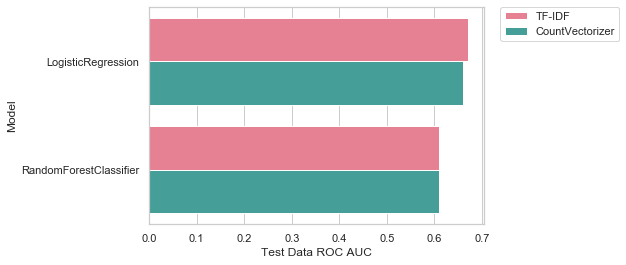

In [72]:
sns.set(style='whitegrid')
sns.barplot(x='Test Data ROC AUC', y='Model', data=comparison, hue='NLP Method', orient='h', 
           palette='husl')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

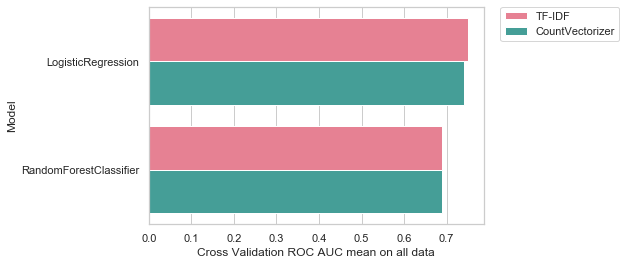

In [73]:
sns.set(style='whitegrid')
sns.barplot(x='Cross Validation ROC AUC mean on all data', y='Model', data=comparison, hue='NLP Method', orient='h', 
           palette='husl')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**Importance of Cross Validation** :

-It gives assurance that the model has got most of the patterns from the data correct, and its not picking up too much on the noise

-This is more robust than just checking the test data set

-As it performs a train test split multiple times (10 times in this case)

Overall the NLP method that for best model performance was overall was TF-IDF combined with the LOgistic Regression Model

**Important features from Logistic Regression model**

In [74]:

class_labels = lr.classes_

# Extract the features: feature_names
feature_names = count_vectorizer.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(lr.coef_[0], feature_names))

In [75]:
pd.DataFrame(feat_with_weights, columns=['score', 'feature_names']).tail(20)

,score,feature_names
4332,0.123941,gain
4333,0.124688,bonus
4334,0.126063,used
4335,0.127338,engage
4336,0.132142,offered
4337,0.132899,machine
4338,0.135285,loan
4339,0.135616,strong
4340,0.138881,etc
4341,0.140803,broader


These words were strongly associated with higher salary role

In [76]:
from wordcloud import WordCloud
import os

from os import path

In [77]:
feats = pd.DataFrame(feat_with_weights, columns=['score', 'feature_names']).tail(20)

In [78]:
text = " ".join(review for review in feats.feature_names)

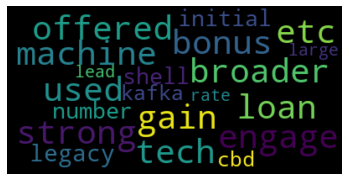

In [79]:
# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()